# **System_Recommendation: Movie Recommendation**

**Nama:** Muhammad Rofi'ul Arham

Project DBS Foundation x Dicoding

## Data Understanding

Dalam proyek ini, dataset yang digunakan adalah [Movie Recommendation](https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data). Dataset ini terdiri dari 4 file CSV. Berikut adalah rincian dari dataset tersebut:

- Links: berisi daftar tautan eksternal untuk setiap film.
- Movies: berisi daftar film yang tersedia.
- Ratings: berisi penilaian pengguna terhadap film.
- Tags: berisi kata kunci atau label yang terkait dengan film.

In [1]:
import pandas as pd

# Import semua file csv
links = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sistem_rekomendasi/ml-latest-small/links.csv')
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sistem_rekomendasi/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sistem_rekomendasi/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sistem_rekomendasi/ml-latest-small/tags.csv')

# Menampilkan jumlah data setiap dataset
print('Jumlah data link movie : ', len(links.movieId.unique()))
print('Jumlah data movie : ', len(movies.movieId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.userId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.movieId.unique()))
print('Jumlah data : ', len(tags.movieId.unique()))

Jumlah data link movie :  9742
Jumlah data movie :  9742
Jumlah data ratings dari user :  610
Jumlah data ratings dari user :  9724
Jumlah data :  1572


## Univariate Exploratory Data Analysis

In [2]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Data Preprocessing

In [7]:
import numpy as np

# Menggabungkan seluruh movieID pada kategori movie
movie_all = np.concatenate((
    links.movieId.unique(),
    movies.movieId.unique(),
    ratings.movieId.unique(),
    tags.movieId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))

print('Jumlah seluruh data movie berdasarkan movieID: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieID:  9742


In [8]:
# Menggabungkan seluruh userId
user_all = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique(),

))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  610


In [9]:
movie_info = pd.concat([links, movies, ratings, tags])
movie = pd.merge(ratings, movie_info , on='movieId', how='left')
movie

,userId_x,movieId,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
0,1,1,4.0,964982703,114709.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN
2,1,1,4.0,964982703,NaN,NaN,NaN,NaN,1.0,4.0,9.649827e+08,NaN
3,1,1,4.0,964982703,NaN,NaN,NaN,NaN,5.0,4.0,8.474350e+08,NaN
4,1,1,4.0,964982703,NaN,NaN,NaN,NaN,7.0,4.5,1.106636e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6359580,610,170875,3.0,1493846415,4630562.0,337339.0,NaN,NaN,NaN,NaN,NaN,NaN
6359581,610,170875,3.0,1493846415,NaN,NaN,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,NaN,NaN,NaN,NaN
6359582,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,50.0,1.0,1.514498e+09,NaN
6359583,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,249.0,3.0,1.505165e+09,NaN


In [10]:
movie.isnull().sum()

,0
userId_x,0
movieId,0
rating_x,0
timestamp_x,0
imdbId,6258749
tmdbId,6258762
title,6258749
genres,6258749
userId_y,201672
rating_y,434885


In [11]:
movie.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
movieId,,,,,,,,,,,
1,14498880,185460.0,53441180205380,24662435.0,185330.0,Toy Story (1995)Toy Story (1995)Toy Story (199...,Adventure|Animation|Children|Comedy|FantasyAdv...,14465415.0,181245.0,5.304394e+13,pixarpixarfunpixarpixarfunpixarpixarfunpixarpi...
2,4205116,43790.0,14492875665352,12484670.0,972840.0,Jumanji (1995)Jumanji (1995)Jumanji (1995)Juma...,Adventure|Children|FantasyAdventure|Children|F...,4060210.0,41525.0,1.437287e+13,fantasymagic board gameRobin Williamsgamefanta...
3,825832,9492.0,2926881125616,5887856.0,811304.0,Grumpier Old Men (1995)Grumpier Old Men (1995)...,Comedy|RomanceComedy|RomanceComedy|RomanceCome...,796900.0,8814.0,2.836734e+12,moldyoldmoldyoldmoldyoldmoldyoldmoldyoldmoldyo...
4,13851,148.5,56610468432,804195.0,219499.0,Waiting to Exhale (1995)Waiting to Exhale (199...,Comedy|Drama|RomanceComedy|Drama|RomanceComedy...,10773.0,115.5,4.403036e+10,0
5,777987,7976.5,2577949287482,5539009.0,581238.0,Father of the Bride Part II (1995)Father of th...,ComedyComedyComedyComedyComedyComedyComedyCome...,765723.0,7374.5,2.494850e+12,pregnancyremakepregnancyremakepregnancyremakep...
...,...,...,...,...,...,...,...,...,...,...,...
193581,552,12.0,4611327246,5476944.0,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,0
193583,552,10.5,4611328635,5914996.0,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,0
193585,552,10.5,4611329415,6397426.0,479308.0,Flint (2017),Drama,184.0,3.5,1.537110e+09,0


In [12]:
# Menggabungkan Data dengan Fitur Nama Movie

# Definisikan dataframe rating ke dalam variabel all_movie_rate
all_movie_rate = ratings
all_movie_rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [13]:
all_movie_name = pd.merge(all_movie_rate, movies[['movieId','title','genres']], on='movieId', how='left')
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [14]:
# Menggabungkan dataframe genres dengan all_movie_name dan memasukkannya ke dalam variabel all_movie
all_movie = pd.merge(all_movie_name, tags[['movieId','tag']], on='movieId', how='left')
all_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


## Data Preparation

In [15]:
# Mengatasi missing value
all_movie.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,52549


In [16]:
all_movie_clean = all_movie.dropna()
all_movie_clean

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking


In [17]:
all_movie_clean.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,0


In [18]:
fix_movie = all_movie_clean.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres,tag
179580,389,1,5.0,857934174,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
56606,124,1,4.0,1336584336,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
56605,124,1,4.0,1336584336,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
56604,124,1,4.0,1336584336,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
223267,480,1,3.0,1179178004,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81533,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,gintama
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime


In [19]:
print('Jumlah seluruh data fix movie berdasarkan movieID: ', len(fix_movie.movieId.unique()))

Jumlah seluruh data fix movie berdasarkan movieID:  1554


In [20]:
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres,tag
83601,191,1,4.0,829759809,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
41494,90,1,3.0,856353996,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
41495,90,1,3.0,856353996,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
41496,90,1,3.0,856353996,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


In [21]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres,tag
179580,389,1,5.0,857934174,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
114538,259,2,2.0,1146845339,Jumanji (1995),Adventure|Children|Fantasy,fantasy
187264,414,3,4.0,961439278,Grumpier Old Men (1995),Comedy|Romance,moldy
19921,45,5,3.0,959625102,Father of the Bride Part II (1995),Comedy,pregnancy
125516,286,7,3.5,1119562096,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
27633,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,funny
68668,153,184471,0.5,1525553051,Tomb Raider (2018),Action|Adventure|Fantasy,adventure
105028,233,187593,2.5,1536968163,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
237319,514,187595,3.0,1537674946,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars


In [22]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

1554
1554
1554


In [23]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘movie_genre’
movie_data = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_data

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


# Model Development dengan Content Based Filtering

Model Development dengan Content Based Filtering
menggukan fungsi TFIDFVectorizer()

In [24]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(movie_data['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [25]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(movie_data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1554, 24)

In [26]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

In [27]:
# Membuat DataFrame untuk melihat matriks TF-IDF
# Kolom diisi dengan fitur (kata-kata) hasil ekstraksi dari TF-IDF
# Baris diisi dengan judul film

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movie_data.movie_name
).sample(22, axis=1).sample(10, axis=0)

,western,fantasy,romance,children,action,war,film,crime,comedy,noir,...,musical,sci,thriller,no,listed,genres,mystery,imax,drama,animation
movie_name,,,,,,,,,,,,,,,,,,,,,
Gilda (1946),0.0,0.0,0.306072,0.0,0.000000,0.0,0.587754,0.000000,0.000000,0.587754,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.422447,0.0,0.192222,0.0
Zombieland (2009),0.0,0.0,0.000000,0.0,0.550488,0.0,0.000000,0.000000,0.400873,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
"Silence of the Lambs, The (1991)",0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.543394,0.000000,0.000000,...,0.000000,0.000000,0.479261,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
"Bishop's Wife, The (1947)",0.0,0.0,0.690993,0.0,0.000000,0.0,0.000000,0.000000,0.578103,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.433964,0.0
Manhattan (1979),0.0,0.0,0.690993,0.0,0.000000,0.0,0.000000,0.000000,0.578103,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.433964,0.0
"Passion of Joan of Arc, The (Passion de Jeanne d'Arc, La) (1928)",0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
Oscar and Lucinda (a.k.a. Oscar & Lucinda) (1997),0.0,0.0,0.846843,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.531842,0.0
"History of Future Folk, The (2012)",0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.297598,0.000000,...,0.553301,0.462832,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
City of God (Cidade de Deus) (2002),0.0,0.0,0.000000,0.0,0.481487,0.0,0.000000,0.504986,0.000000,0.000000,...,0.000000,0.000000,0.445386,0.0,0.0,0.0,0.000000,0.0,0.263204,0.0


## Cosine Similarity

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

In [29]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_data['movie_name'], columns=movie_data['movie_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,Avatar (2009),Captain Fantastic (2016),Young Frankenstein (1974),Indiana Jones and the Temple of Doom (1984),Mean Creek (2004)
movie_name,,,,,
Buffalo '66 (a.k.a. Buffalo 66) (1998),0.000000,0.531842,0.000000,0.000000,0.270580
Babe (1995),0.000000,0.382854,0.000000,0.000000,0.194781
Barton Fink (1991),0.000000,0.508759,0.000000,0.000000,1.000000
Midnight Cowboy (1969),0.000000,1.000000,0.000000,0.000000,0.508759
Edward Scissorhands (1990),0.000000,0.340315,0.661884,0.501160,0.173138
Shanghai Knights (2003),0.466424,0.000000,0.229943,0.676019,0.000000
Hoosiers (a.k.a. Best Shot) (1986),0.000000,0.531842,0.000000,0.000000,0.270580
Raising Arizona (1987),0.000000,0.000000,0.508106,0.000000,0.000000
Ghostbusters II (1989),0.435070,0.000000,0.666830,0.374553,0.000000


## Mendapatkan Rekomendasi

membuat fungsi movie_recommendations dengan beberapa parameter sebagai berikut:

- Nama_movie : Nama judul dari movie (index kemiripan dataframe).
- Similarity_data : Dataframe mengenai similarity yang telah kita didefinisikan sebelumnya
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘movie_name’ dan ‘genre’.
- k : Banyak rekomendasi yang ingin diberikan.

In [30]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_data[['movie_name', 'genre']], k=5):


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [31]:
movie_data[movie_data.movie_name.eq('John Wick (2014)')]

,id,movie_name,genre
1491,115149,John Wick (2014),Action|Thriller


dari hasil di atas dapat dilihat bahwa pengguna menyukai movie yang berjudul John Wick (2014) yang bergenre Action dan Thriller.
Kemudian kita coba untuk mendapatkan rekomendasi movie yang mirip dengan John Wick (2014).

In [32]:
# Mendapatkan rekomendasi film (movie) yang mirip dengan John Wick (2014)
movie_recommendations('John Wick (2014)')

,movie_name,genre
0,"Siege, The (1998)",Action|Thriller
1,In the Line of Fire (1993),Action|Thriller
2,Air Force One (1997),Action|Thriller
3,Kill Bill: Vol. 2 (2004),Action|Drama|Thriller
4,Natural Born Killers (1994),Action|Crime|Thriller


# Model Development dengan Collaborative Filtering

## Data Understanding

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [34]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Data Preparation

In [35]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [36]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [37]:
# Mapping userId ke dataframe genres
df['genres'] = df['userId'].map(user_to_user_encoded)

# Mapping movieD ke dataframe movies
df['movies'] = df['movieId'].map(movie_to_movie_encoded)

In [38]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Mengubah rating menjadi nilai float
df['ratings'] = df['rating'].values.astype(np.float32)

# Nilai minimun rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


## Membagi Data untuk Training dan Validasi

In [39]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
67037,432,77866,4.5,1335139641,431,4730,4.5
42175,288,474,3.0,978465565,287,474,3.0
93850,599,4351,3.0,1498524542,598,2631,3.0
6187,42,2987,4.0,996262677,41,194,4.0
12229,75,1610,4.0,1158989841,74,727,4.0
...,...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873,4.0
54886,364,141,4.0,869443367,363,524,4.0
76820,480,6867,4.0,1179163171,479,2240,4.0
860,6,981,3.0,845556567,5,712,3.0


In [40]:
# Membuat variabel x untuk mencocokkan data genres  dan movies menjadi satu value
x = df[['genres', 'movies']].values

# Membuat variabel y untuk membuat ratings dari hasil
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


## Proses Training

In [48]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid


In [49]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


In [51]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - loss: 0.6164 - root_mean_squared_error: 0.2125 - val_loss: 0.6116 - val_root_mean_squared_error: 0.2048
Epoch 2/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - loss: 0.6041 - root_mean_squared_error: 0.1982 - val_loss: 0.6078 - val_root_mean_squared_error: 0.2004
Epoch 3/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 0.5993 - root_mean_squared_error: 0.1922 - val_loss: 0.6072 - val_root_mean_squared_error: 0.1997
Epoch 4/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - loss: 0.5964 - root_mean_squared_error: 0.1891 - val_loss: 0.6071 - val_root_mean_squared_error: 0.1992
Epoch 5/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 0.5968 - root_mean_squared_error: 0.1887 - val_loss: 0.6066 - val_root_mean_squared_error: 0.1987
Epoch 6/20
10084/10084 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - loss: 0.5924 - root_mean_squared_error: 0.1854 - val_loss: 0.6064 - val_root_mean_squared_error: 0.1984
Epoch 7/20
10084/10084

## Visualisasi Metrik

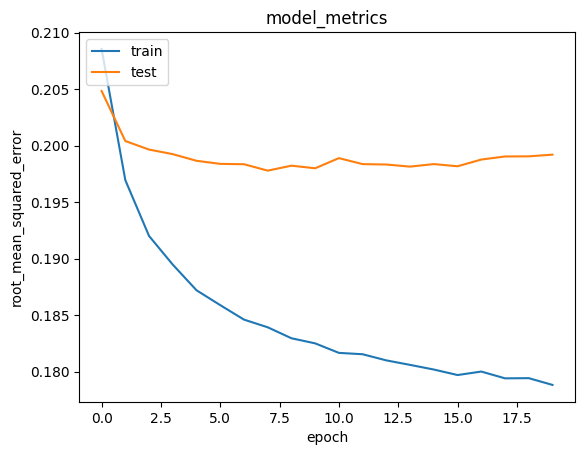

In [52]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan rekomendasi film (movie)

In [53]:
movie_df = movie_data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sistem_rekomendasi/ml-latest-small/ratings.csv')

user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]


movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [54]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Showing recommendations for users: 368
movie with high ratings from user
--------------------------------
Pulp Fiction (1994) : Comedy|Crime|Drama|Thriller
Schindler's List (1993) : Drama|War
Aliens (1986) : Action|Adventure|Horror|Sci-Fi
Apocalypse Now (1979) : Action|Drama|War
Chinatown (1974) : Crime|Film-Noir|Mystery|Thriller
--------------------------------
Top 10 movie recommendation
--------------------------------
Paths of Glory (1957) : Drama|War
On the Waterfront (1954) : Crime|Drama
Yojimbo (1961) : Action|Adventure
Born Yesterday (1950) : Comedy
Creature Comforts (1989) : Animation|Comedy
Double Indemnity (1944) : Crime|Drama|Film-Noir
Guess Who's Coming to Dinner (1967) : Drama
Hustler, The (1961) : Drama
Son of Rambow (2007) : Children|Comedy|Drama
Captain Fantastic (2016) : Drama
